In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import librosa
from librosa.feature import melspectrogram
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

from data import read_config
config_path = 'unfreeze_word_layers.cfg'
config = read_config(config_path)

base_path = config.slu_path

# 1. Transcription 데이터 탐색

In [2]:
train_df = pd.read_csv(os.path.join(base_path, "data", "train_data.csv"), index_col=0)
valid_df = pd.read_csv(os.path.join(base_path, "data", "valid_data.csv"), index_col=0)
test_df = pd.read_csv(os.path.join(base_path, "data", "test_data.csv"), index_col=0)
print(f'Train Dataset Size : {len(train_df)}')
print(f'Valid Dataset Size : {len(valid_df)}')
print(f'Test Dataset Size : {len(test_df)}')

Train Dataset Size : 23132
Valid Dataset Size : 3118
Test Dataset Size : 3793


In [3]:
train_df.head(20)

,path,speakerId,transcription,action,object,location
0,wavs/speakers/2BqVo8kVB2Skwgyb/0a3129c0-4474-1...,2BqVo8kVB2Skwgyb,Change language,change language,none,none
1,wavs/speakers/2BqVo8kVB2Skwgyb/0ee42a80-4474-1...,2BqVo8kVB2Skwgyb,Resume,activate,music,none
2,wavs/speakers/2BqVo8kVB2Skwgyb/144d5be0-4474-1...,2BqVo8kVB2Skwgyb,Turn the lights on,activate,lights,none
3,wavs/speakers/2BqVo8kVB2Skwgyb/1811b6e0-4474-1...,2BqVo8kVB2Skwgyb,Switch on the lights,activate,lights,none
4,wavs/speakers/2BqVo8kVB2Skwgyb/1d9f3920-4474-1...,2BqVo8kVB2Skwgyb,Switch off the lights,deactivate,lights,none
5,wavs/speakers/2BqVo8kVB2Skwgyb/269fc210-4474-1...,2BqVo8kVB2Skwgyb,Volume up,increase,volume,none
6,wavs/speakers/2BqVo8kVB2Skwgyb/5bbda3f0-4478-1...,2BqVo8kVB2Skwgyb,Turn the volume up,increase,volume,none
7,wavs/speakers/2BqVo8kVB2Skwgyb/6436ad60-4478-1...,2BqVo8kVB2Skwgyb,Turn the volume down,decrease,volume,none
8,wavs/speakers/2BqVo8kVB2Skwgyb/6a1cd6f0-4478-1...,2BqVo8kVB2Skwgyb,Turn up the temperature,increase,heat,none
9,wavs/speakers/2BqVo8kVB2Skwgyb/72160200-4478-1...,2BqVo8kVB2Skwgyb,Turn the heat up,increase,heat,none


In [4]:
## 전체 화자 수 (train + validation + test)
len(glob('/data/speechdb/fluent_speech_commands_dataset/wavs/speakers/*'))

97

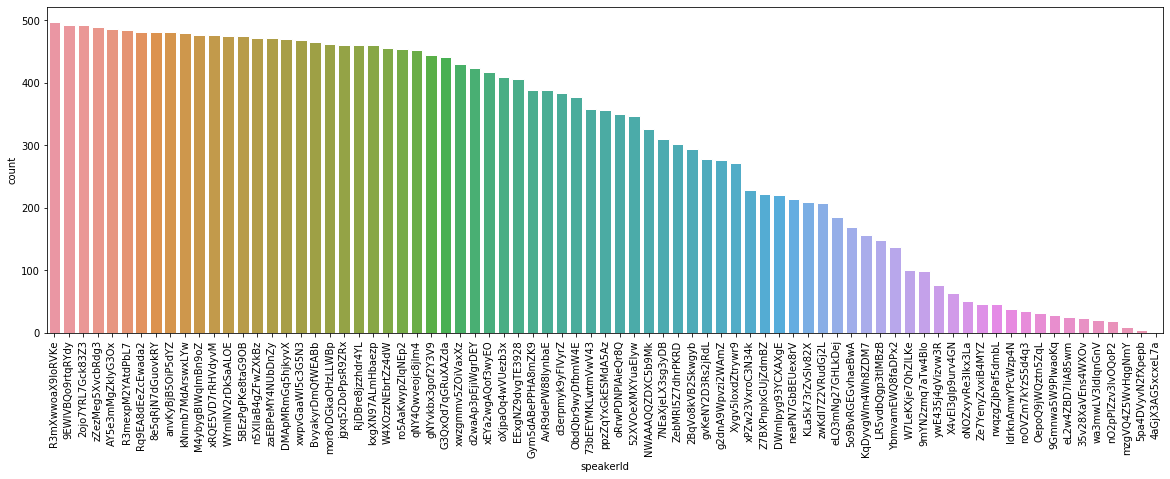

In [5]:
## 학습데이터 셋의 화자
fig, ax = plt.subplots(1,1, figsize=(20,6))
sns.set_style("whitegrid")
count_classes_fig = sns.countplot(x="speakerId", data=train_df, ax=ax, order = train_df['speakerId'].value_counts().index)
for item in count_classes_fig.get_xticklabels():
    item.set_rotation(90)

In [111]:
## 학습데이터 중 고빈도 발화
train_df['transcription'].value_counts()[:20]

Put on the music                           105
Start the music                            105
Turn off the music                         105
Turn the temperature down                  105
Volume up                                  105
Turn off the lamp                          104
Quieter                                    103
Turn the volume up                         103
Decrease the temperature in the bedroom    103
Kitchen lights on                          103
Resume                                     102
Switch on the kitchen lights               102
Turn the heat up                           102
Volume down                                101
Turn the lights on                         101
Turn on the lamp                           101
Switch the lights on                       101
Turn the lights on in the kitchen          101
Louder please                              101
That’s too loud                            101
Name: transcription, dtype: int64

In [112]:
## 학습데이터 중 저빈도 발화
train_df['transcription'].value_counts()[-20:]

Turn down the heat in the kitchen                    86
Open language settings                               86
Could you decrease the heating please?               86
Switch on the lights in the bedroom                  86
Set my phone's language to Chinese                   85
Set the language                                     85
Turn on the lights                                   85
Get me my socks                                      85
Turn the temperature up in the bathroom              85
I need to practice my German. Switch the language    84
Lights off in the washroom                           84
Turn down the bedroom heat                           84
Turn up the heat in the bathroom                     83
Switch on the lights in the kitchen                  82
Turn the temperature down in the bathroom            82
Decrease volume                                      80
I need to practice my Korean. Switch the language    78
OK now switch the main language to German       

In [6]:
## 전체 intent
intents = train_df.groupby(['action', 'object', 'location']).size()
print(intents)

action           object     location
activate         lamp       none         391
                 lights     bedroom      546
                            kitchen      769
                            none         484
                            washroom     940
                 music      none         692
bring            juice      none         466
                 newspaper  none         551
                 shoes      none         536
                 socks      none         538
change language  Chinese    none         449
                 English    none         349
                 German     none         342
                 Korean     none         345
                 none       none         994
deactivate       lamp       none         401
                 lights     bedroom      563
                            kitchen      557
                            none         478
                            washroom     457
                 music      none         634
decrease         h

# 3. 음성 데이터 탐색

In [7]:
def show_wave(samples, sample_rate=16000, figsize=(20, 4)):
    fig = plt.figure(figsize=figsize)
    plt.plot(np.linspace(0, len(samples)/sample_rate, len(samples)), samples)
    plt.title('Raw wave')
    plt.ylabel('Amplitude')
    plt.show()
        
def show_spectrogram(wav, sample_rate=16000, figsize=(20, 4)):
    spect = log_specgram(wav)
    fig = plt.figure(figsize=figsize)
    plt.imshow(spect, aspect='auto', origin='lower')
    plt.title('Spectrogram')
    plt.ylabel('Freqs in Hz')
    plt.xlabel('Seconds')
    plt.show()
    
def log_specgram(wav, eps=1e-8):
    D = librosa.stft(wav, n_fft=240, hop_length=60, win_length=240, window='hamming')
    spect, phase = librosa.magphase(D)
    return np.log(spect + eps)    

In [8]:
temp_df = train_df[train_df['transcription']=='Turn off the lamp']
temp_df[:20]

,path,speakerId,transcription,action,object,location
22,wavs/speakers/2BqVo8kVB2Skwgyb/97bc86f0-4478-1...,2BqVo8kVB2Skwgyb,Turn off the lamp,deactivate,lamp,none
168,wavs/speakers/2BqVo8kVB2Skwgyb/97474f90-447b-1...,2BqVo8kVB2Skwgyb,Turn off the lamp,deactivate,lamp,none
331,wavs/speakers/2ojo7YRL7Gck83Z3/9ba61580-45de-1...,2ojo7YRL7Gck83Z3,Turn off the lamp,deactivate,lamp,none
577,wavs/speakers/2ojo7YRL7Gck83Z3/3ac44450-45e1-1...,2ojo7YRL7Gck83Z3,Turn off the lamp,deactivate,lamp,none
796,wavs/speakers/35v28XaVEns4WXOv/7d20cf80-449c-1...,35v28XaVEns4WXOv,Turn off the lamp,deactivate,lamp,none
848,wavs/speakers/52XVOeXMXYuaElyw/da769870-45c5-1...,52XVOeXMXYuaElyw,Turn off the lamp,deactivate,lamp,none
1092,wavs/speakers/52XVOeXMXYuaElyw/dbbcccb0-45c8-1...,52XVOeXMXYuaElyw,Turn off the lamp,deactivate,lamp,none
1430,wavs/speakers/5BEzPgPKe8taG9OB/f5214e60-457d-1...,5BEzPgPKe8taG9OB,Turn off the lamp,deactivate,lamp,none
1822,wavs/speakers/73bEEYMKLwtmVwV43/b86022e0-4527-...,73bEEYMKLwtmVwV43,Turn off the lamp,deactivate,lamp,none
1964,wavs/speakers/73bEEYMKLwtmVwV43/9dcee3d0-452c-...,73bEEYMKLwtmVwV43,Turn off the lamp,deactivate,lamp,none


In [9]:
sample_path_1 = os.path.join(base_path, temp_df.path[22])
sample_path_2 = os.path.join(base_path, temp_df.path[168])
sample_path_3 = os.path.join(base_path, temp_df.path[1430])

In [10]:
wav_1, sr = librosa.load(sample_path_1, sr=None)
ipd.Audio(wav_1, rate=sr)

In [11]:
wav_2, sr = librosa.load(sample_path_2, sr=None)
ipd.Audio(wav_2, rate=sr)

In [12]:
wav_3, sr = librosa.load(sample_path_3, sr=None)
ipd.Audio(wav_3, rate=sr)

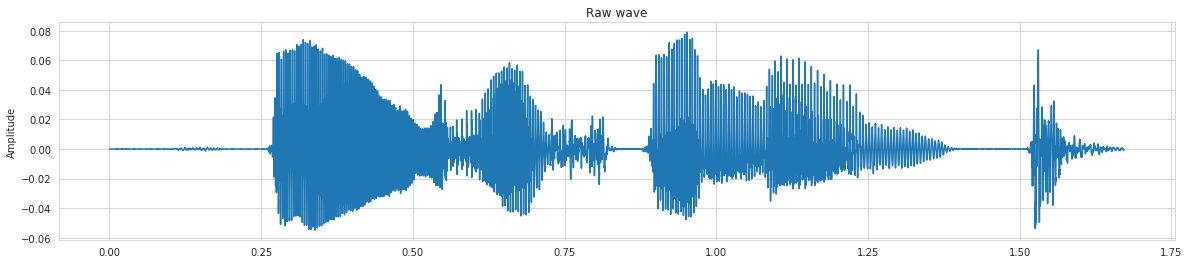

In [13]:
show_wave(wav_1)

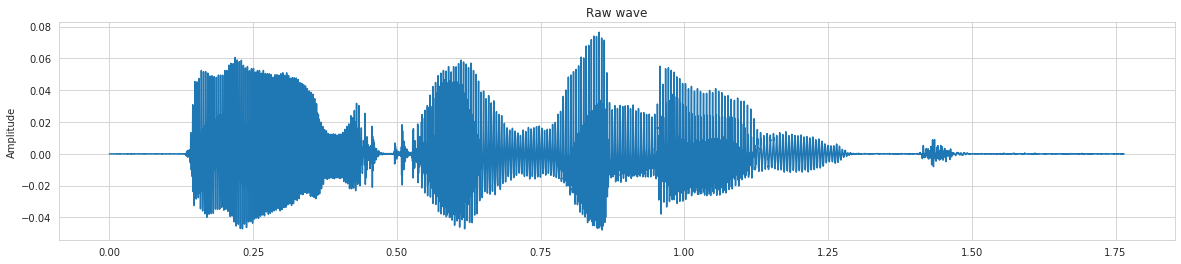

In [14]:
show_wave(wav_2)

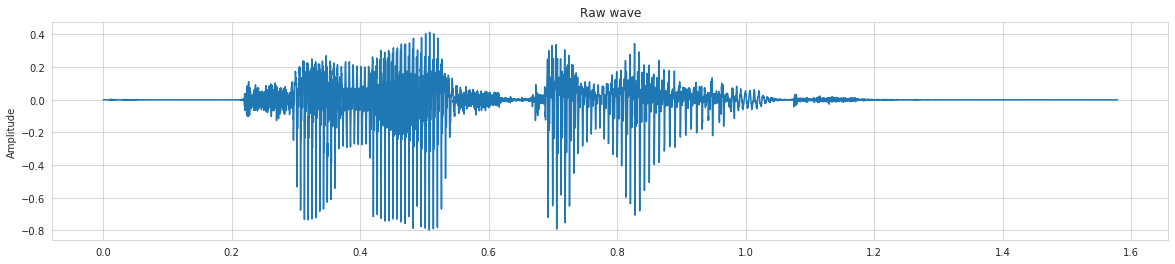

In [15]:
show_wave(wav_3)

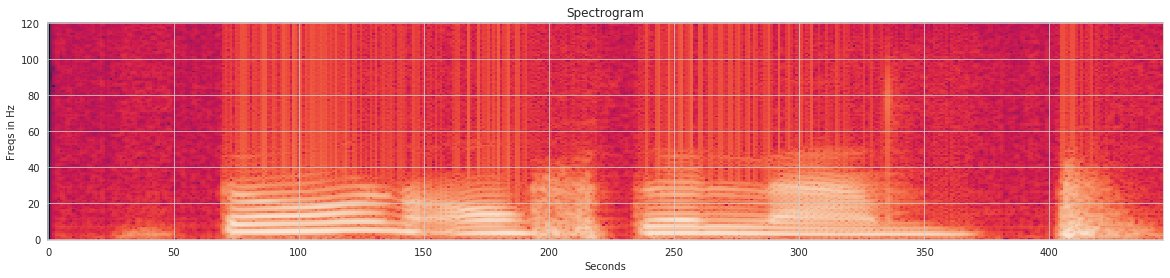

In [16]:
show_spectrogram(wav_1)

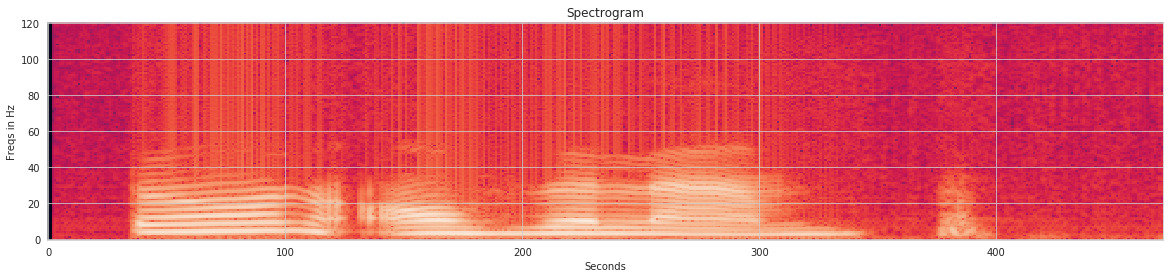

In [17]:
show_spectrogram(wav_2)

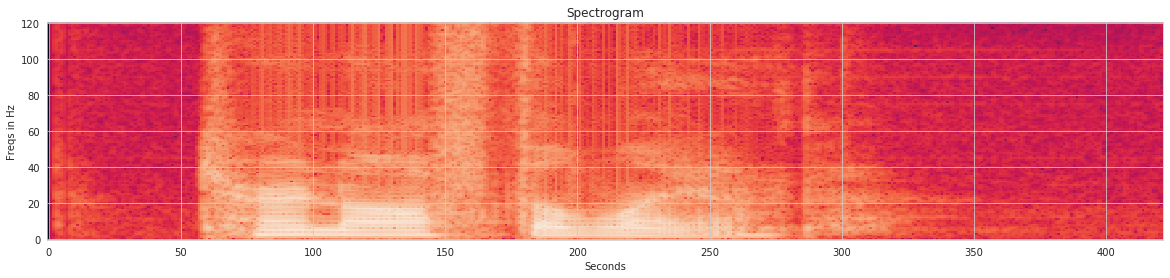

In [18]:
show_spectrogram(wav_3)